### 1. Importing Required Modules & Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import parallel_coordinates
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import sklearn.cluster as cluster
import scipy.optimize as opt
import matplotlib.gridspec as gridspec 

### 2. Defining Functions

In [8]:
#Functions used for this projects mentioned below

def read_csv_custom(wb_file_name):
    """This is the docstring of the function read_csv_custom to read the data from the world bank csv
    file downloaded from the world bank site """
    """This is the docstring of the function read_csv_custom to read the data from the world bank csv
    file downloaded from the world bank site
    
    
    Custom function to read a CSV file into a list of dictionaries without using Pandas.

    Parameters:
    - filepath (str): The path to the CSV file to be read.
    - delimiter (str, optional): Character used to separate values in the file. Defaults to ','.
    - skip_header (bool, optional): Whether to skip the first row (header) of the CSV file. 
      Defaults to False.

    Returns:
    - list of dict: A list where each element is a dictionary representing a row in the CSV file. 
      Column headers are used as keys.

    
    
    """
    #Reading data from the world bank csv file downloaded from the world bank website
    climate_change_df = pd.read_csv(wb_file_name, skiprows=0) 
    
    climate_change_df.drop(climate_change_df.columns[[-1]], axis=1, inplace=True)
    
    #Deriving data with Years as columns
    climate_year_df = climate_change_df[:]  
    
    #Deriving dataframe with country name as columns
    climate_country_df = climate_change_df.groupby(['Country Name']).aggregate('first').transpose()
    
    return climate_country_df, climate_year_df







    
    
    
from sklearn import cluster
import matplotlib.pyplot as plt

    

def perform_kmeans_clustering(dataset, x_dim, y_dim, num_clusters, plot_title):
    
    # Set up the KMeans clustering algorithm with the specified number of clusters
    kmeans_clusterer = cluster.KMeans(n_clusters=num_clusters)

    # Select the relevant columns for clustering
    dataset_for_clustering = dataset[[x_dim, y_dim]].copy()
    kmeans_clusterer.fit(dataset_for_clustering)     

    # Extract the labels and centroids from the clustering algorithm
    labels = kmeans_clusterer.labels_
    centroids = kmeans_clusterer.cluster_centers_

    # Define a list of colors for plotting
    colors = ["cyan", "maroon", "lime", "purple", "gold", "silver"]

    # Plot the data points, colored by cluster label
    for label_id in range(num_clusters):     
        plt.scatter(dataset_for_clustering[x_dim][labels == label_id], 
                    dataset_for_clustering[y_dim][labels == label_id],
                    marker='o', s=64, color=colors[label_id], label=f'Cluster {label_id+1}')
    
    # Plot the centroids
    for centroid_id in range(num_clusters):
        centroid_x, centroid_y = centroids[centroid_id]
        plt.scatter(centroid_x, centroid_y, marker='x', s=100, color='black', edgecolor='black')

    plt.title(plot_title)
    plt.xlabel(x_dim)
    plt.ylabel(y_dim)
    plt.legend()
    plt.grid(True)
    plt.show()   

    
  

    #PART 2-FITTING Functions defined below


def calculate_exponential_growth(period, base_value, rate_of_increase):
    """ Computes exponential growth based on a base value and a growth rate. The calculation
    assumes the starting point is the year 1960."""

    growth_amount = base_value * np.exp(rate_of_increase * (period - 1960))
    
    return growth_amount
        

def compute_logistic_growth(epoch, capacity, rate, midpoint):
    """ Computes a logistic growth curve using the carrying capacity, growth rate, 
    and the midpoint as the inflection point of the curve."""

    logistic_value = capacity / (1 + np.exp(-rate * (epoch - midpoint)))
    
    return logistic_value


def err_ranges(data, modl, parameter, sigma_val):
    
    """Calculates the upper_limits and lower_limits for the corresponding function.
    The parameter and sigma for single value. Function values are calculated for 
    all combination of +&- sigmas and the minimum and maximum is identified."""

    import itertools as iter
    
    # initiate arrays for lower/upper_limits
    lower_lim = modl(data, *parameter)
    upper_lim = lower_lim
    
    # holding upper and lower limits for parameters into a list
    uplow_lim = []
    
    #iteration
    for q,t in zip(parameter, sigma_val):
        pmin_val = q-t
        pmax_val = q+t
        uplow_lim.append((pmin_val, pmax_val))
        
    pmix_val = list(iter.product(*uplow_lim))
    
    for q in pmix_val:
        y_modl = modl(data, *q)
        lower_lim = np.minimum(lower_lim, y_modl)
        upper_lim = np.maximum(upper_lim, y_modl)
        
    return lower_lim, upper_lim


def render_fit_visualization(dataset, horizontal_axis, vertical_axis, fitting_values, horizontal_label, vertical_label, graph_title, data_color, fit_color):
    
    """ Generates a plot to compare raw data against fitted values. Accepts the dataset, 
    specified axes for plotting, axis labels, plot title, and color specifications for the plot."""

    plt.figure()
    plt.plot(dataset[horizontal_axis], dataset[vertical_axis], label="Observed Data", color=data_color)
    plt.plot(dataset[horizontal_axis], dataset[fitting_values], label="Fitted Curve", color=fit_color)

    plt.legend()
    plt.title(graph_title)
    plt.xlabel(horizontal_label)
    plt.ylabel(vertical_label)
    plt.show()



### 3. Defining Global Variables and Parameters

In [9]:
#Defining Global Variables & List used for the use of data manipulation

Total_urban_population= "SP.POP.TOTL"
CO2_emissions = "EN.ATM.CO2E.KT"
Renewable_energy_consumption  = "EG.FEC.RNEW.ZS"
Forest_area ='AG.LND.FRST.K2'
Total_greenhouse_gas_emissions='EN.ATM.GHGT.ZG'

urban_population="SP.URB.TOTL"
Electricity = "EG.ELC.RNWX.KH"
Foreign_invest = "EG.USE.PCAP.KG.OE"


#Indicator_replace list used to replace the Indicator code with an understandig words
Indicator_replace = {"SP.POP.TOTL":"Total_urban_population","EN.ATM.CO2E.KT":"CO2 emissions","EG.FEC.RNEW.ZS":"Renewable_energy",'AG.LND.FRST.K2':'Forest_area','EN.ATM.GHGT.ZG':'Total_greenhouse_gas_emissions',
                  "SP.URB.TOTL":"urban_population","EG.ELC.RNWX.KH":"Electricity","EG.USE.PCAP.KG.OE":"Foreign_invest"}

#Indicator_map used for maping the data-frame with corresponding indicators used by World bank data
Indicator_map = ["SP.POP.TOTL","EN.ATM.CO2E.KT","EG.FEC.RNEW.ZS","SP.URB.TOTL","EG.ELC.RNWX.KH","EG.USE.PCAP.KG.OE",'EN.ATM.GHGT.ZG','AG.LND.FRST.K2']

### 4. Reading Data Frames using Funtion From the World Bank Data File

In [10]:
#Assigning World Bank Data file name to a variable
wb_file_name = '/kaggle/input/important-data/API_19_DS2_en_csv_v2_6300757.csv'

In [11]:
#Using World Bank Reader function defined in the function section to generate 2x data frame as per the assignment requirement
country_df, year_df = read_csv_custom(wb_file_name)

###### 4.1 Returning Dataframe with Transposed format ( Countries as columns )

In [12]:
country_df.head()

Country Name,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,...,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Country Code,AFG,AFE,AFW,ALB,DZA,ASM,AND,AGO,ATG,ARB,...,UZB,VUT,VEN,VNM,VIR,PSE,WLD,YEM,ZMB,ZWE
Indicator Name,Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),...,Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population),Urban population (% of total population)
Indicator Code,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,...,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS,SP.URB.TOTL.IN.ZS
1960,8.401,14.56381,14.705391,30.705,30.51,66.211,58.45,10.435,39.656,31.022162,...,33.978,10.404,61.613,14.7,56.477,44.044,33.602516,9.1,18.145,12.608
1961,8.684,14.81141,15.090123,30.943,31.797,66.641,60.983,10.798,39.04,31.754677,...,34.238,10.583,62.875,15.031,57.864,44.734,34.089565,9.459,18.951,12.821


###### 4.2 Returning Dataframe with Original Format (Years as columns)

In [13]:
year_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045


### 5. Re-arranging Data frame for the Analysis

#### 5.1 Arranging Data Frame

In [14]:
# Filtering out the required indicators for the anlysis from the previously defined Indicator Map list
year_df_new = year_df[year_df['Indicator Code'].isin(Indicator_map)]

In [15]:
# Replacing Not Identifiable Indicator code in to a known Identifiers
year_df_new["Indicator Code"].replace(Indicator_replace, inplace=True)

year_df_new = year_df_new.copy(deep=True) #To avoid warning related to the 'caveat'

In [16]:
# Droping Country Name  & Indicator Name as it is already defined
year_df_new = year_df_new.drop(['Country Code', 'Indicator Name'], axis=1, inplace=False)

In [17]:
country_data = year_df_new.reset_index()

In [18]:
#Normalizing the index for the easy analysis
country_data.drop(['index'], axis=1, inplace=True)

In [19]:
stat_data = country_data.groupby(['Country Name', 'Indicator Code']).aggregate('mean')

In [20]:
df_env_f = stat_data.stack().unstack(level=1)

stat_data2 = df_env_f.groupby(['Country Name']).aggregate('mean')

In [21]:
stat_data_orig = stat_data2.reset_index()

In [22]:
stat_data_orig

Indicator Code,Country Name,CO2 emissions,Electricity,Foreign_invest,Forest_area,Renewable_energy,Total_greenhouse_gas_emissions,Total_urban_population,urban_population
0,Afghanistan,4.821062e+03,NaN,NaN,1.208440e+04,27.041563,11.476205,1.804367e+07,3.782772e+06
1,Africa Eastern and Southern,4.526406e+05,1.360800e+09,764.484376,4.896484e+06,63.329697,NaN,3.459695e+08,9.809432e+07
2,Africa Western and Central,1.539137e+05,1.075111e+08,564.938162,1.912740e+06,81.264337,NaN,2.357148e+08,8.339247e+07
3,Albania,3.881955e+03,0.000000e+00,747.961218,7.811928e+03,40.236129,-33.026241,2.712054e+06,1.128717e+06
4,Algeria,1.057612e+05,1.711111e+06,814.847841,1.777714e+04,0.319032,31.178656,2.560887e+07,1.482561e+07
...,...,...,...,...,...,...,...,...,...
260,West Bank and Gaza,NaN,NaN,NaN,9.582031e+01,17.249688,NaN,3.409209e+06,2.508644e+06
261,World,2.817335e+07,2.350455e+11,1585.774035,4.118018e+07,17.335888,16.022615,5.366554e+09,2.452904e+09
262,"Yemen, Rep.",1.595708e+04,0.000000e+00,203.683381,5.490000e+03,1.366774,109.671297,1.554513e+07,4.174525e+06
263,Zambia,3.320688e+03,0.000000e+00,713.107295,4.654279e+05,86.377097,36.032278,8.878663e+06,3.390336e+06


#### 5.2 Handling Null Values

In [23]:
# Handling the null values
stat_data_orig['CO2 emissions'].fillna(stat_data_orig['CO2 emissions'].mean(), inplace=True)
stat_data_orig['Electricity'].fillna(stat_data_orig['Electricity'].mean(), inplace=True)
stat_data_orig['Foreign_invest'].fillna(stat_data_orig['Foreign_invest'].mean(), inplace=True)
stat_data_orig['Renewable_energy'].fillna(stat_data_orig['Renewable_energy'].mean(), inplace=True)
stat_data_orig['Total_urban_population'].fillna(stat_data_orig['Total_urban_population'].mean(), inplace=True)
stat_data_orig['urban_population'].fillna(stat_data_orig['urban_population'].mean(), inplace=True)
stat_data_orig['Total_greenhouse_gas_emissions'].fillna(stat_data_orig['Total_greenhouse_gas_emissions'].mean(), inplace=True)
stat_data_orig['Forest_area'].fillna(stat_data_orig['Forest_area'].mean(), inplace=True)

In [24]:
stat_data_orig.isnull().any()

Indicator Code
Country Name                      False
CO2 emissions                     False
Electricity                       False
Foreign_invest                    False
Forest_area                       False
Renewable_energy                  False
Total_greenhouse_gas_emissions    False
Total_urban_population            False
urban_population                  False
dtype: bool

### 6. Normalization

###### 6.1 Checking the Statistics Parmeters on the Original Data

In [25]:
print(stat_data_orig.describe())

Indicator Code  CO2 emissions   Electricity  Foreign_invest   Forest_area  \
count            2.650000e+02  2.650000e+02      265.000000  2.650000e+02   
mean             1.023848e+06  1.018329e+10     1884.023297  1.655810e+06   
std              3.060533e+06  2.625936e+10     2137.508169  4.992984e+06   
min              8.680645e+00  0.000000e+00       12.495558  0.000000e+00   
25%              3.881955e+03  3.557778e+07      584.048121  3.622650e+03   
50%              4.181496e+04  1.468311e+09     1434.874957  3.847742e+04   
75%              6.065543e+05  1.018329e+10     2060.951105  3.325120e+05   
max              2.817335e+07  2.350455e+11    18278.542120  4.118018e+07   

Indicator Code  Renewable_energy  Total_greenhouse_gas_emissions  \
count                 265.000000                      265.000000   
mean                   31.049588                       39.929938   
std                    28.964216                      112.885960   
min                     0.000000  

###### 6.2 Finding the Correlation between Indicators on Original Data

In [26]:
def plot_scatter(dataframe, x_column, y_column):
    
    """Generates a scatter plot comparing two columns from a DataFrame with 
    circle markers."""
    
    plt.scatter(dataframe[x_column], dataframe[y_column], marker='o', s=36)
    
    plt.xlabel(x_column)
    plt.ylabel(y_column)

    

def correlation_heatmap(correlation_matrix):
    
    """Generates a heatmap visualization for the provided correlation matrix, typically derived from the DataFrame.corr() method."""
    
    # Apply a style theme for the plot background
    plt.style.use('ggplot')
    
    # Create a heatmap using seaborn library to visualize the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    
    # Display the heatmap
    plt.show()

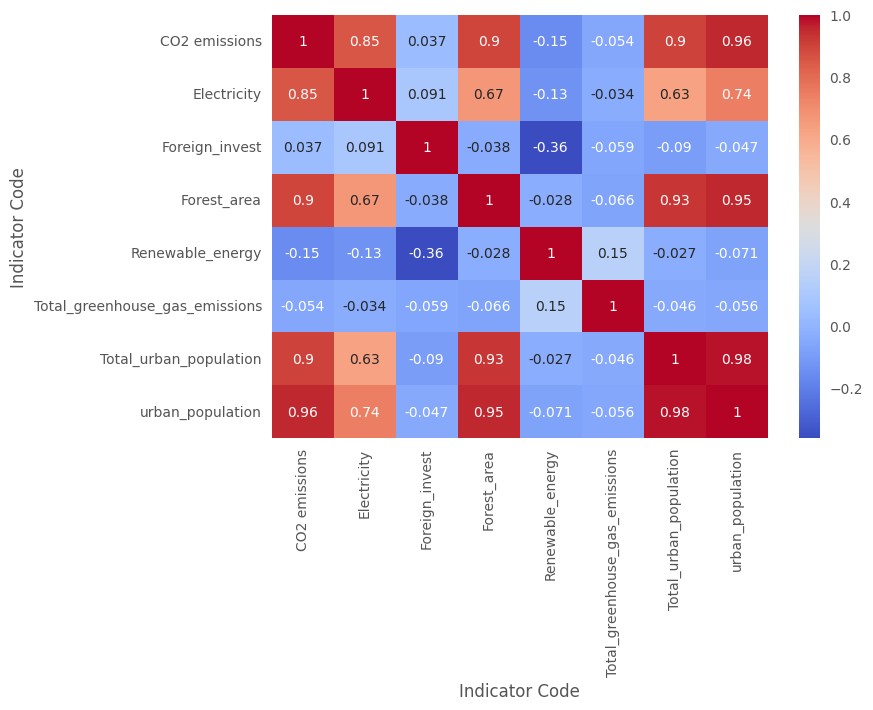

In [27]:
numeric_data = stat_data_orig.select_dtypes(include=[np.number])

# Calculate the correlation matrix
data_corr = numeric_data.corr()  

# Assuming correlation_heatmap is a function you've defined to plot the correlation matrix
correlation_heatmap(data_corr)


###### 6.3 Normalizing the Data & Displaying the Correlation

In [28]:
### PART 1- Functions Normalization & Clustering

def scale_column(data_column):
    """ Normalizes a single column to the range [0,1]."""

    min_value = data_column.min()
    max_value = data_column.max()
    
    scaled_output = (data_column - min_value) / (max_value - min_value)
    
    return scaled_output


def scale_dataframe(scale_data):
    
    """ Normalizes all columns of the DataFrame to the range [0,1], 
    excluding the first column (assumed to contain non-numeric data).
    It leverages the 'scale_column' function to perform the normalization
    of each column."""
    
    # Iterate over each column in the DataFrame, skipping the first
    for column_name in scale_data.columns[1:]:  # Skip the first column
        scale_data[column_name] = scale_column(scale_data[column_name])
        
    return scale_data

In [29]:
# Normalizing the data for the good fitting & displaying the statistical parameters of the data frame

stat_data_orig = scale_dataframe(stat_data_orig)

print(stat_data_orig.describe())

Indicator Code  CO2 emissions  Electricity  Foreign_invest  Forest_area  \
count              265.000000   265.000000      265.000000   265.000000   
mean                 0.036341     0.043325        0.102459     0.040209   
std                  0.108632     0.111720        0.117021     0.121247   
min                  0.000000     0.000000        0.000000     0.000000   
25%                  0.000137     0.000151        0.031290     0.000088   
50%                  0.001484     0.006247        0.077870     0.000934   
75%                  0.021529     0.043325        0.112146     0.008075   
max                  1.000000     1.000000        1.000000     1.000000   

Indicator Code  Renewable_energy  Total_greenhouse_gas_emissions  \
count                 265.000000                      265.000000   
mean                    0.321863                        0.063592   
std                     0.300246                        0.070600   
min                     0.000000                    

In [30]:
def plot_scatter(dataframe, x_column, y_column):
    
    """Generates a scatter plot comparing two columns from a DataFrame with 
    circle markers."""
    
    plt.scatter(dataframe[x_column], dataframe[y_column], marker='o', s=36)
    
    plt.xlabel(x_column)
    plt.ylabel(y_column)

    

def correlation_heatmap(correlation_matrix):
    
    """Generates a heatmap visualization for the provided correlation matrix, typically derived from the DataFrame.corr() method."""
    
    # Apply a style theme for the plot background
    plt.style.use('ggplot')
    
    # Create a heatmap using seaborn library to visualize the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    
    # Display the heatmap
    plt.show()

### 7. 
Before proceeding, we'll display several attribute combinations by employing a function that utilizes GridSpec() for layout arrangement.

We are exploring various combinations of indicators to identify distinct clusters through scatter plots. Based on the analysis of these plots, we have determined that the following parameters are effective for creating discernible and analyzable clusters.

#### 1. CO2 vs Electricity
#### 2. CO2 vs Population 
#### 3. CO2 vs Urban Population
#### 4. Urban Population Energy vs Population
#### 5. Forest vs Urban Population 
#### 6. Forest vs CO2

In [31]:
def plot_fit_with_confidence(dataframe, lower_bound, upper_bound, horizontal_dim, vertical_dim, fit_series, label_x, label_y, graph_title, color_data, color_fit, color_confidence):
    
    """ Creates a plot displaying the fitted curve, the raw data, and the confidence interval around the fit.
        Inputs include the dataframe, confidence interval bounds, labels, and color specifications."""
    
    plt.figure()
    plt.title(graph_title)
    plt.plot(dataframe[horizontal_dim], dataframe[vertical_dim], label="Observed", color=color_data)
    plt.plot(dataframe[horizontal_dim], dataframe[fit_series], label="Model Fit", color=color_fit)

    plt.fill_between(dataframe[horizontal_dim], lower_bound, upper_bound, alpha=0.5, color=color_confidence, label="Confidence")
    plt.legend()
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()
    
    
def generate_optimal_fit_visualization(dataset, prediction_data, forecast_values, confidence_lower, confidence_upper, horizontal_axis, vertical_axis, label_horizontal, label_vertical, plot_title, color_observed, color_forecast, color_confidence):
    """ Constructs a plot showcasing the optimal fit alongside forecasted values with a confidence interval. 
        The function accepts the dataset, confidence interval bounds, and various plot styling parameters."""

    plt.figure()
    plt.title(plot_title)
    plt.plot(dataset[horizontal_axis], dataset[vertical_axis], label=label_vertical, color=color_observed)
    plt.plot(prediction_data, forecast_values, label="Projected", color=color_forecast)

    plt.fill_between(prediction_data, confidence_lower, confidence_upper, alpha=0.5, color=color_confidence, label="Confidence Interval")
    plt.legend()
    plt.xlabel(label_horizontal)
    plt.ylabel(label_vertical)
    plt.show()

In [33]:
def square_plot(data, xaxis, yaxis):
    
    """Produces a square plot of two columns of dataframe df using small circle 
    symbols."""
    
    plt.plot(data[xaxis], data[yaxis], "o", markersize=6)
    
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)

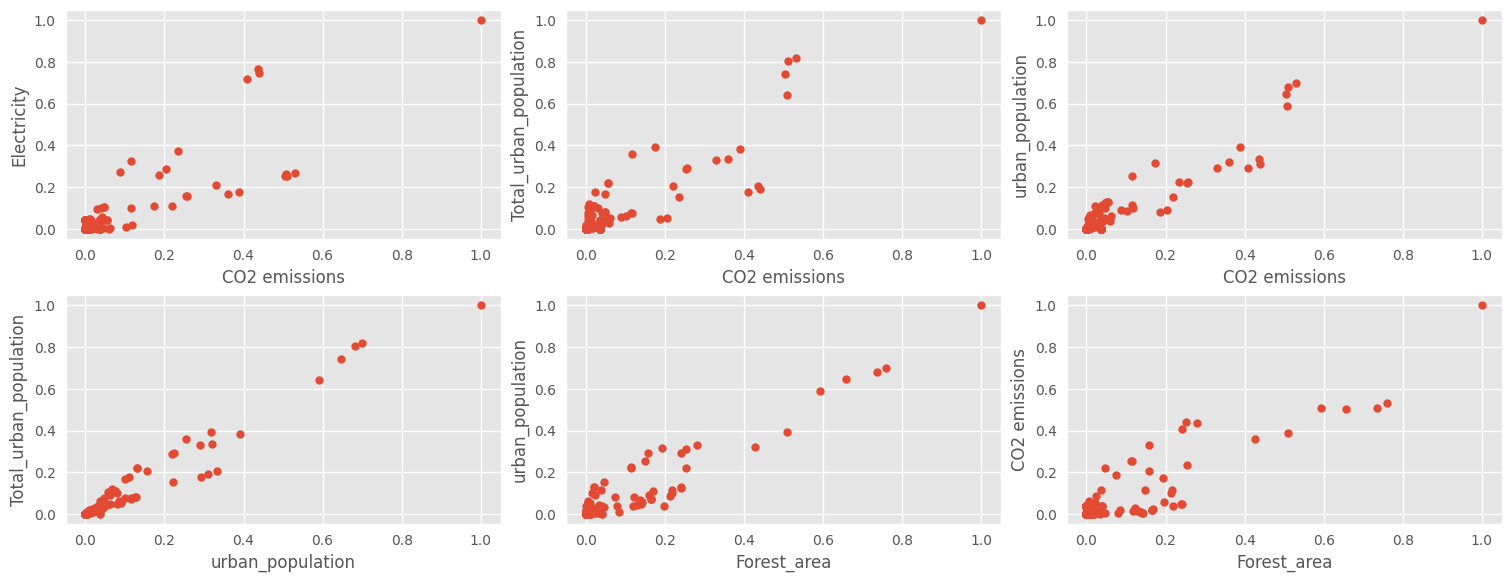

In [37]:
# Set up gridspec figure
fig = plt.figure(figsize=(15,8), constrained_layout=True)  # Setting the layout size to print it on the A4 Sheet

# Setting the Columns & Rows to the Grid Spec object
gs = fig.add_gridspec(nrows=3, ncols=3) 

ax1 = fig.add_subplot(gs[0,0])
#ax1.set_axis_off()

square_plot(stat_data_orig, "CO2 emissions", "Electricity")

ax2 = fig.add_subplot(gs[0,1])
square_plot(stat_data_orig, "CO2 emissions", "Total_urban_population")

ax3 = fig.add_subplot(gs[0,2])
square_plot(stat_data_orig, "CO2 emissions", "urban_population")


ax4 = fig.add_subplot(gs[1,0])
square_plot(stat_data_orig, "urban_population", "Total_urban_population")


ax5 = fig.add_subplot(gs[1,1])
square_plot(stat_data_orig, "Forest_area", "urban_population")

ax6 = fig.add_subplot(gs[1,2])
square_plot(stat_data_orig, "Forest_area", "CO2 emissions")







### 8. Implementing Cluster Analysis with the K-Means Algorithm and Visualizing Cluster Groupings

Based on the insights from the previous plots, we observe that six distinct plots demonstrate tighter clustering. We will now apply a custom K-means function to identify clusters within the chosen indicators. In this process, we have decided to set the number of clusters to four, guided by the findings from our initial pre-processing analysis.

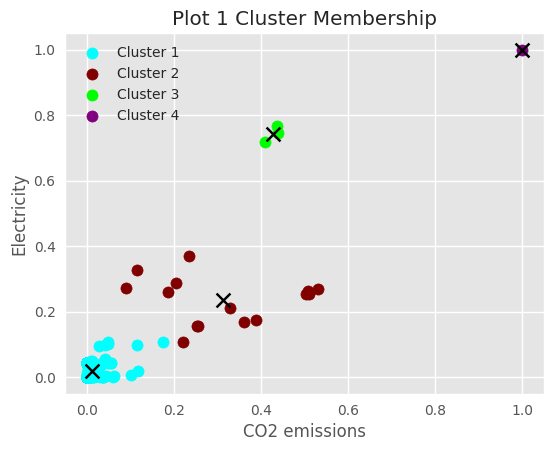

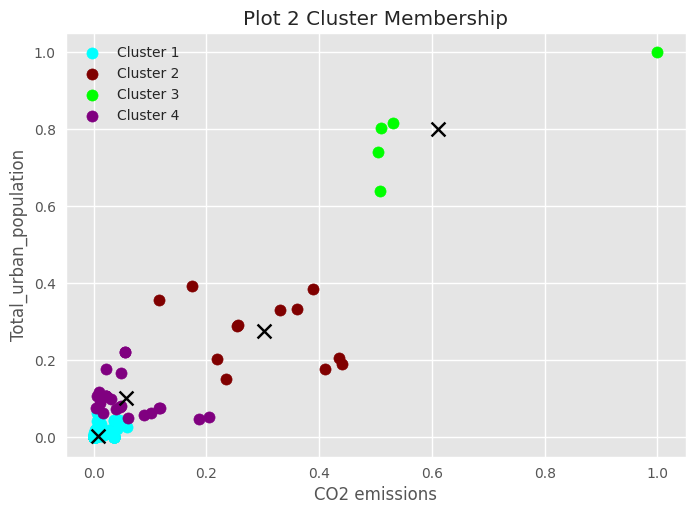

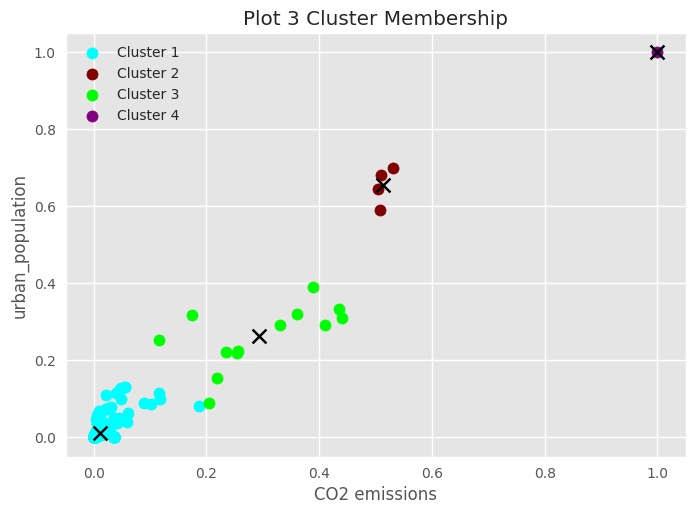

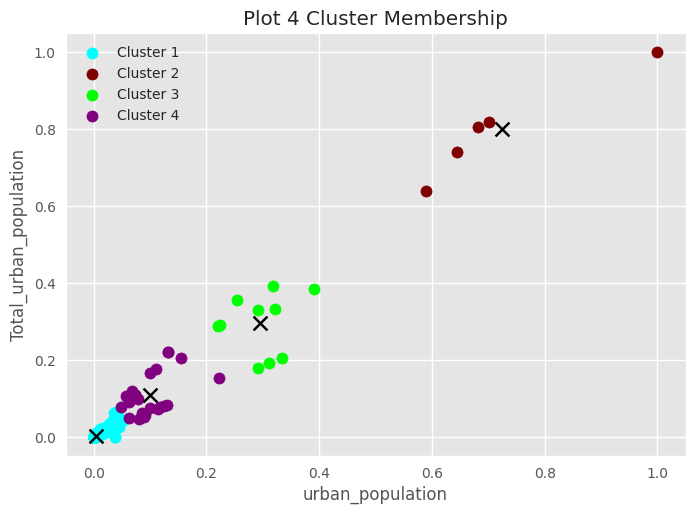

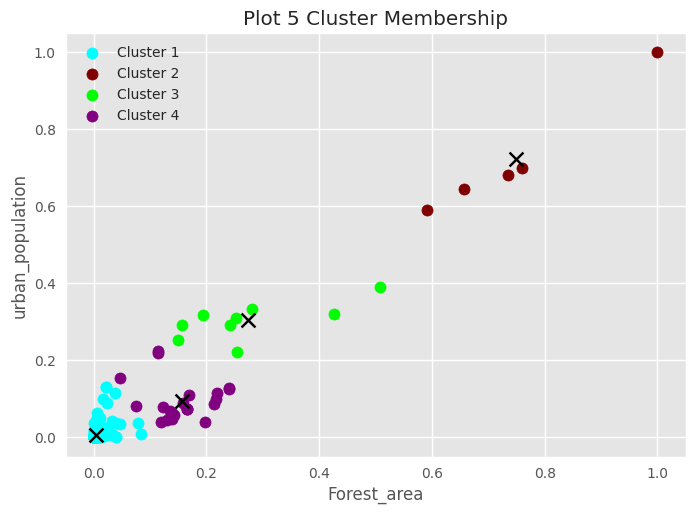

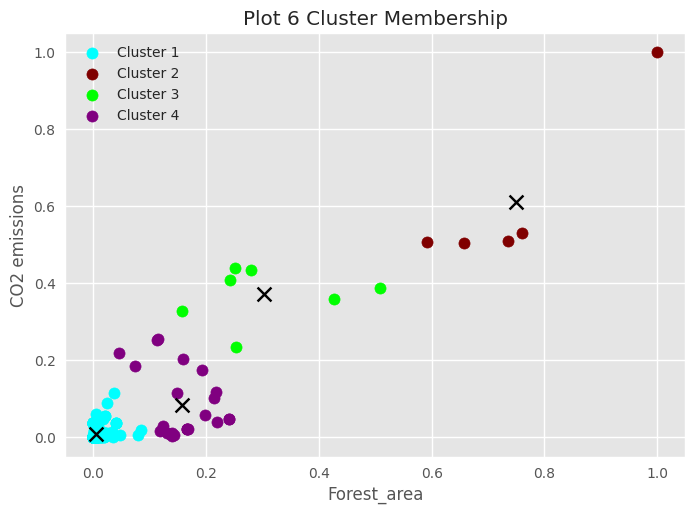

In [40]:
# Set up gridspec figure
fig = plt.figure(figsize=(15, 8), constrained_layout=True)  # Setting the layout size to print it on the A4 Sheet

# Setting the Columns & Rows to the Grid Spec object
gs = fig.add_gridspec(nrows=2, ncols=3) 
ax1 = fig.add_subplot(gs[0,0])
#ax1.set_axis_off()
perform_kmeans_clustering (stat_data_orig,"CO2 emissions", "Electricity", 4, "Plot 1 Cluster Membership")

ax2 = fig.add_subplot(gs[0,1])
perform_kmeans_clustering (stat_data_orig,"CO2 emissions", "Total_urban_population", 4, "Plot 2 Cluster Membership")

ax3 = fig.add_subplot(gs[0,2])
perform_kmeans_clustering (stat_data_orig,"CO2 emissions", "urban_population", 4, "Plot 3 Cluster Membership")


ax4 = fig.add_subplot(gs[1,0])
perform_kmeans_clustering (stat_data_orig,"urban_population", "Total_urban_population", 4, "Plot 4 Cluster Membership")


ax5 = fig.add_subplot(gs[1,1])
perform_kmeans_clustering (stat_data_orig,"Forest_area", "urban_population", 4, "Plot 5 Cluster Membership")


ax6 = fig.add_subplot(gs[1,2])
perform_kmeans_clustering (stat_data_orig,"Forest_area", "CO2 emissions", 4, "Plot 6 Cluster Membership")

### 9. Analysis & Findings on Clustering Data

The cluster analysis suggests a relationship between electricity usage and CO2 emissions among the observed entities. There is a general trend where increased electricity usage correlates with higher CO2 emissions, with some exceptions potentially due to the use of clean energy technologies or energy-efficient practices.

# 10. Fitting & Prediction ( till the year 2050)

Phase 1: This stage involves analyzing the time series data of CO2 emissions from 1960 to 2020 for two major emitting countries, China and India, as they exhibit significant growth in CO2 emissions over the years.

Phase 2: We will employ the curve_fit function for data fitting to construct the model.

Phase 3: Our approach includes two distinct modeling techniques: one based on exponential growth and the other utilizing a logistic function.

Phase 4: Both models will be applied to make future predictions.

Phase 5: By using the Error_range function, we aim to establish the boundaries and confidence intervals for the predictions from both models.

Phase 6: The final step involves graphically representing the most accurately fitted model, along with its predictions and associated confidence ranges.

### 10.1 Generating the Time series data of India and China

In [41]:
# Extracting population data of India & China from the world bank data frame using pandas data frame slicing

pop_stat = df_env_f.loc[['China'], ['urban_population']]

pop_stat_chn = df_env_f.loc[['India'], ['urban_population']]

# Removing the indexing for the time series analysis
pop_stat_orig = pop_stat.reset_index()

pop_stat_orig_chn = pop_stat_chn.reset_index()

# Renaming the default column name to 'Years'

pop_stat_orig.rename({'level_1':'Years'}, axis=1, inplace=True)

pop_stat_orig_chn.rename({'level_1':'Years'}, axis=1, inplace=True)

pop_stat_orig.head()

Indicator Code,Country Name,Years,urban_population
0,China,1960,108085352.0
1,China,1961,110327936.0
2,China,1962,114685540.0
3,China,1963,121162226.0
4,China,1964,127791981.0


### 10.2 Finding the Year when the urban population Growth Start Increasing Exponentially to Define the model range

In [42]:
pop_stat_orig[['urban_population', 'Years']].values[25]  #Population in 1985

array([240414890.0, '1985'], dtype=object)

In [43]:
pop_stat_orig[['urban_population', 'Years']].values[40]   #Population in 2000

array([452999147.0, '2000'], dtype=object)

### 10.3 Converting World Bank Data values from String to Numeric

In [44]:
#Converting String to Numeric (as the data that have extracted data from the CSV considered as the String)

pop_stat_orig['urban_population'] = pop_stat_orig['urban_population'].astype(int)

pop_stat_orig['Years'] = pop_stat_orig['Years'].astype(int)

pop_stat_orig_chn['urban_population'] = pop_stat_orig_chn['urban_population'].astype(int) 

pop_stat_orig_chn['Years'] = pop_stat_orig_chn['Years'].astype(int)



### 10.4 Fitting with  Exponential function Model & Forcasting with Uncertainity values

#### 10.4.1 Fitting using Exponential Function with Default Parameters & Values

In [45]:
def exp_growth(time, scale_val, growth_val):
    """ Calculating exponential_function 'xf' with scale value and growth value as free_parameters"""
    
    xf = scale_val*np.exp(growth_val*(time-1960)) 
    
    return xf

In [46]:
# fit exponential growth with default parameters

popt, co_var = opt.curve_fit(exp_growth, pop_stat_orig["Years"], pop_stat_orig["urban_population"])


In [47]:
# use *popt to pass on the fit parameters used for the modeling

pop_stat_orig["urban_population_exp"] = exp_growth(pop_stat_orig["Years"], *popt)


Exponential Fit parameter [-8.69516975e-15  1.00000000e+00]


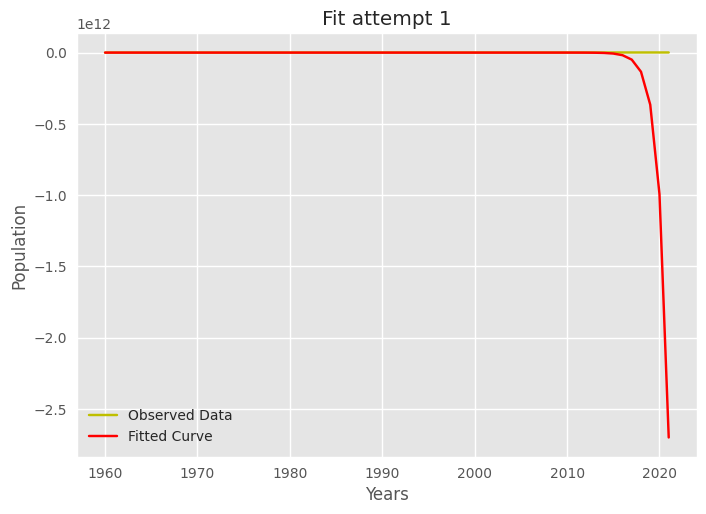

In [48]:
# Plotting the Fitting Attempt Using the values received from the Curve_Fit() and default data

print("Exponential Fit parameter", popt)

# Calling custom plot function defined before to plot the fit model Red & Yellow

render_fit_visualization(pop_stat_orig, "Years", "urban_population", "urban_population_exp", "Years", "Population", "Fit attempt 1", 'y', 'r')


#### 10.4.2 Finding a start approximation & Fitting Attempt 2 (setting CO2 emissions parameter ( popt )values)

In [49]:
# Finding the required start value for the time series data


popt = [2e8, 0.01]

pop_stat_orig["urban_population_exp"] = exp_growth(pop_stat_orig["Years"], *popt)


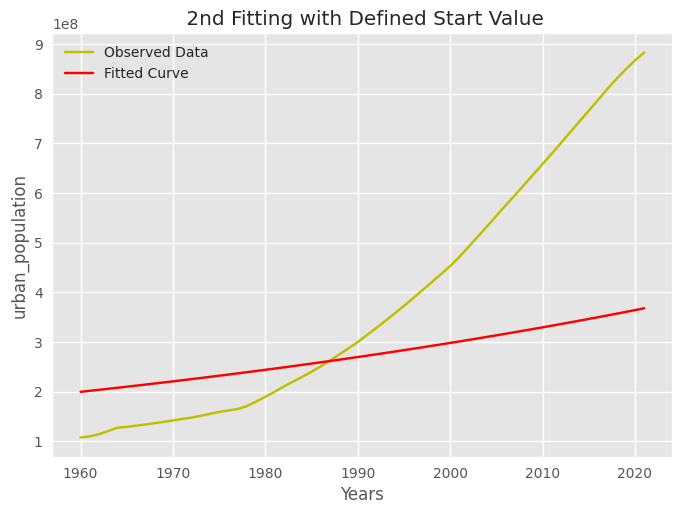

In [50]:
# Calling pre-defined Plotting function for the Fitted Model

render_fit_visualization(pop_stat_orig, "Years", "urban_population", "urban_population_exp", "Years", "urban_population", 
          " 2nd Fitting with Defined Start Value", 'y', 'r')


#### 10.4.3 Final Fitting using Curve_Fit ( by applying the best Fit parameters obtained above)

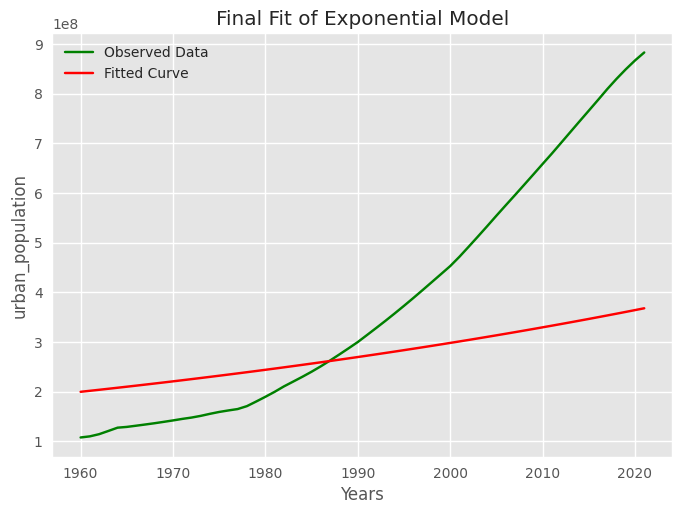

Fit parameter [200000000.0, 0.01]


In [51]:
# Calling pre-defined Plotting function for the Fitted Model & Displaying Fit Parameters

render_fit_visualization(pop_stat_orig, "Years", "urban_population", "urban_population_exp", "Years", "urban_population", 
         "Final Fit of Exponential Model", 'g', 'r')

print("Fit parameter", popt) 


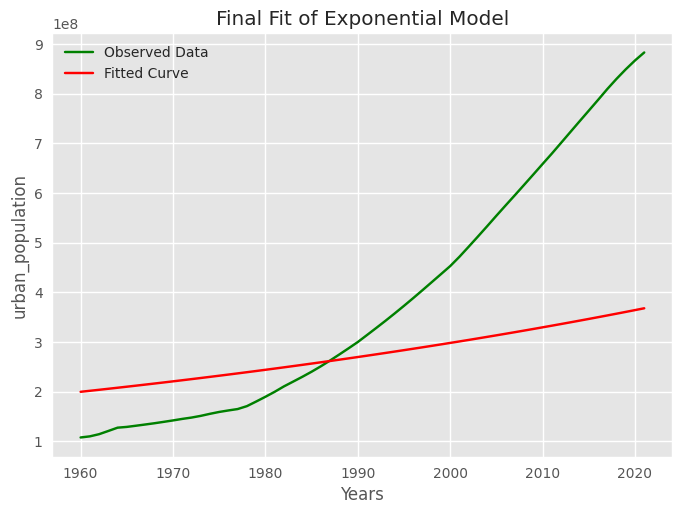

Fit parameter [200000000.0, 0.01]


In [52]:
# Calling pre-defined Plotting function for the Fitted Model & Displaying Fit Parameters

render_fit_visualization(pop_stat_orig, "Years", "urban_population", "urban_population_exp", "Years", "urban_population", 
         "Final Fit of Exponential Model", 'g', 'r')

print("Fit parameter", popt) 


#### 10.4.4 Finding Exponential Model Error Ranges

In [53]:
# Finding the upper and lower limits of the error ranges using Error Range Funtion
# extracting the sigma value from the Diagonal of the co_variance-Matrix
sigma = np.sqrt(np.diag(co_var))

# Calling the Pre-defined Error Range Funtion to find the error ranges
low, up = err_ranges(pop_stat_orig["Years"], exp_growth, popt, sigma)

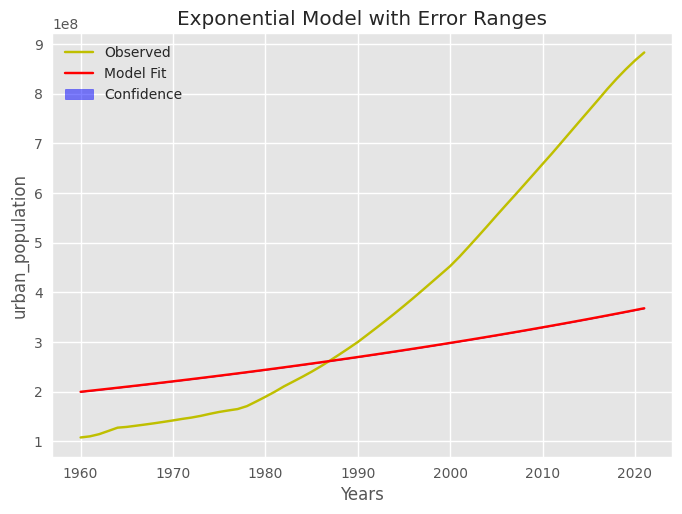

Sigma [1.60605974e-13 5.95834750e-08]


In [54]:
# Calling pre-defined Plotting funtion for the Fitted Model

plot_fit_with_confidence(pop_stat_orig, low, up, "Years", "urban_population", "urban_population_exp", "Years", "urban_population", 
             "Exponential Model with Error Ranges", 'y', 'r', 'b')

print("Sigma", sigma)

#### 10.4.5 Forcasting the Data till the year 2050 using Exponential Model

In [55]:
# Forcasting the data using on upcoming years with upper & lower limits. ie every next 10 year till the year 2050
print("Forcasted population")

low, up = err_ranges(2030, exp_growth, popt, sigma)
print("2030 between ", low, "and", up)

low, up = err_ranges(2040, exp_growth, popt, sigma)
print("2040 between ", low, "and", up)

low, up = err_ranges(2050, exp_growth, popt, sigma)
print("2050 between ", low, "and", up)


Forcasted population
2030 between  402748861.6882196 and 402752221.3069773
2040 between  445106064.01615214 and 445110307.39094836
2050 between  491917984.30785197 and 491923260.1690738


#### 10.4.6 Forcasting the Data till the year 2050 using Exponential Model with Mean & Uncertainity Values

In [56]:
# Printing the Exponenital Model Prediction Uncertainity

print("Forcasted population")
low, up = err_ranges(2030, exp_growth, popt, sigma)
mean = (up+low)/2.0
pm = (up-low)/2.0
print("2030:", mean, "+/-", pm)

low, up = err_ranges(2040, exp_growth, popt, sigma)
mean = (up+low)/2.0
pm = (up-low)/2.0
print("2040:", mean, "+/-", pm)

low, up = err_ranges(2050, exp_growth, popt, sigma)
mean = (up+low)/2.0
pm = (up-low)/2.0
print("2050:", mean, "+/-", pm)

Forcasted population
2030: 402750541.4975984 +/- 1679.8093788325787
2040: 445108185.7035502 +/- 2121.6873981058598
2050: 491920622.2384629 +/- 2637.930610924959


### 10.5 Fitting with compute_logistic_growth function Model & Forcasting with Uncertainity values

#### 10.5.1 Finding a start approximation & Improved Fitting

In [57]:
def logistics(time, scale_val, growth_val, time0):
    """ Calculating logistics_function 'lm' with scale_value & growth_value
    and time'0' as the triggering point as free parameter_values"""
    
    lf = scale_val/(1.0+np.exp(-growth_val*(time-time0)))
    
    return lf

In [58]:
# estimated turning year: 1985 to 2000 , The growth what we have seen in 270 Million that is in 2000, 
# population reaches to 1.05Billion
# population in 1985: about 780 million
# best fitting functions happening with growth factor of 0.05 & exponential value of 8e8 with start value 1985

popt = [2e9, 0.05, 1985]

# Calling the pre defined logistics model function with indicators

pop_stat_orig["pop_log"] = logistics(pop_stat_orig["Years"], *popt)


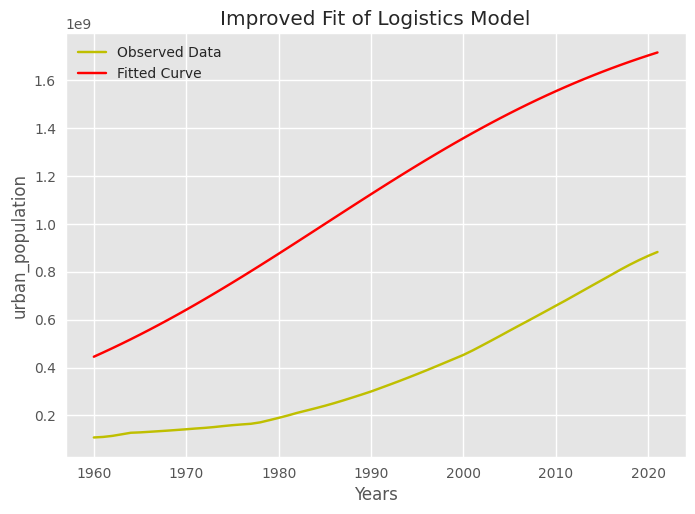

In [59]:
# Calling pre-defined fiting plot
render_fit_visualization (pop_stat_orig, "Years", "urban_population", "pop_log", "Years", 
          "urban_population", "Improved Fit of Logistics Model", 'y', 'r')


In [60]:
#For the canada population model 3e9 value works better than 2e9 with growth factor of 0.05
popt_chn = [3e9, 0.05, 1985]

# Callign the pre defined logistics model function with indicators
pop_stat_orig_chn["pop_log_chn"] = logistics(pop_stat_orig_chn["Years"], *popt_chn)


#### 10.5.2 Final Fitting using Curve_Fit (  compute_logistic_growth Model )

In [61]:
# fit logistics model growth by applying the best Fit parameters obtained from above step to teh curve_fit funtion

popt, co_var = opt.curve_fit(logistics, pop_stat_orig["Years"], pop_stat_orig["urban_population"], 
                            p0=(2e9, 0.01, 1985))

# Calling Logistics Model Function with popt obtained from the curve fit
pop_stat_orig["pop_log"] = logistics(pop_stat_orig["Years"], *popt)

In [62]:
# fitting of data using Canada
popt_chn, co_var_chn = opt.curve_fit(logistics, pop_stat_orig_chn["Years"], pop_stat_orig_chn["urban_population"], 
                            p0=(2e9, 0.05, 1985))

# Calling Logistics Model Function with popt obtained from the curve fit
pop_stat_orig_chn["pop_log_chn"] = logistics(pop_stat_orig_chn["Years"], *popt_chn)

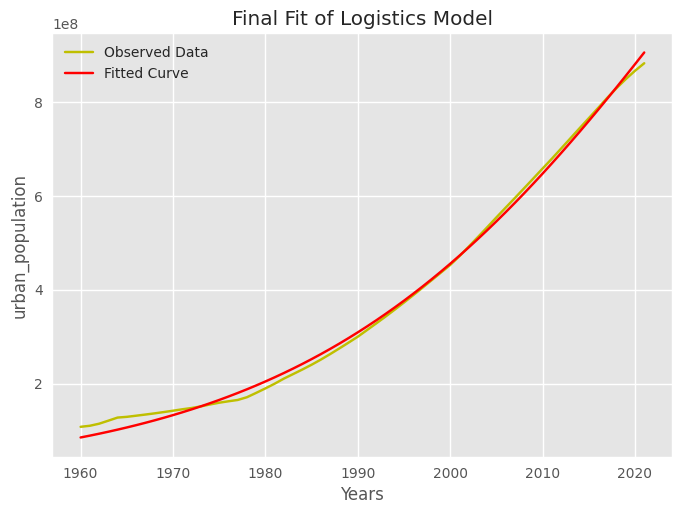

Fit parameter [2.23937622e+09 4.65770498e-02 2.02930300e+03]


In [63]:
render_fit_visualization (pop_stat_orig,"Years", "urban_population", "pop_log", "Years", "urban_population",
          "Final Fit of Logistics Model", 'y', 'r')

print("Fit parameter", popt)


#### 10.5.3 Finding Error Ranges ( compute_logistic_growth Model )

In [64]:
# Finding the upper and lower limits of the error ranges using Error Range Function for India
# extract the sigmas from the diagonal of the co_variance matrix

sigma = np.sqrt(np.diag(co_var))
print(sigma)

# Calling the Pre-defined Error Range Function to find the error ranges in the Logistics Model
low, up = err_ranges(pop_stat_orig["Years"], logistics, popt, sigma)


[1.96868172e+08 1.20516133e-03 3.20092904e+00]


In [65]:
# Finding the upper and lower limits of the error ranges using Error Range Function for China
# extract the sigmas from the diagonal of the co_variance matrix

sigma_chn = np.sqrt(np.diag(co_var_chn))
print(sigma_chn)

# Calling the Pre-defined Error Range Function to find the error ranges into the Logistics Model
low_chn, up_chn = err_ranges(pop_stat_orig_chn["Years"], logistics, popt_chn, sigma_chn)

[2.20520697e+07 3.15025214e-04 9.60524947e-01]


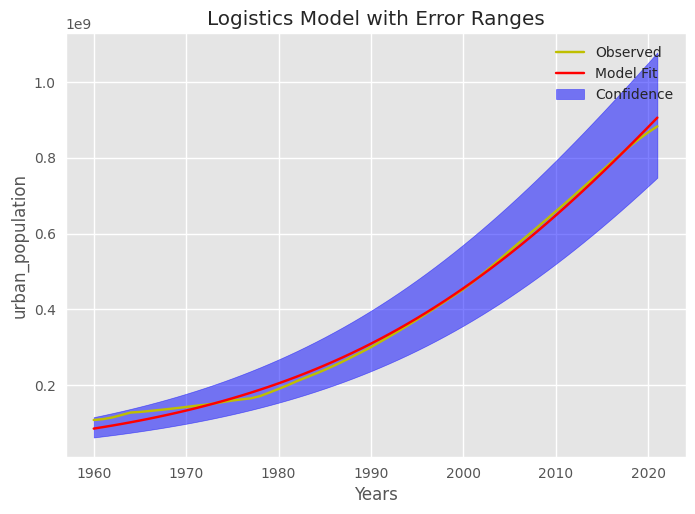

Sigma [1.96868172e+08 1.20516133e-03 3.20092904e+00]


In [66]:
# Calling pre-defined Plotting funtion for the Fitted Model
plot_fit_with_confidence(pop_stat_orig, low, up, "Years", "urban_population", "pop_log", "Years",
             "urban_population", "Logistics Model with Error Ranges", 'y', 'r', 'b')

print("Sigma", sigma)

#### 10.5.4 Forcasting the Data till the year 2050 ( compute_logistic_growth Model )

In [67]:
# Forcasting the data using on upcoming years with upper & lower limits. ie every next 10 year using Logistics Model

print("Forcasted population of China")

low, up = err_ranges(2030, logistics, popt, sigma)
print("2030 between ", low, "and", up)

low, up = err_ranges(2040, logistics, popt, sigma)
print("2040 between ", low, "and", up)

low, up = err_ranges(2050, logistics, popt, sigma)
print("2050 between ", low, "and", up)

Forcasted population of China
2030 between  960233818.037207 and 1331234171.243894
2040 between  1193268961.669168 and 1608347539.6547587
2050 between  1406579515.346375 and 1846740475.5274408


In [68]:
# Forcasting the data using on upcoming years with upper & lower limits. ie every next 10 year using Logistics Model
print("Forcasted population of India")
      
low_chn, up_chn = err_ranges(2030, logistics, popt_chn, sigma_chn)
print("2030 between ", low_chn, "and", up_chn)
      
low_chn, up_chn = err_ranges(2040, logistics, popt_chn, sigma_chn)
print("2040 between ", low_chn, "and", up_chn)
      
low_chn, up_chn = err_ranges(2050, logistics, popt_chn, sigma_chn)
print("2050 between ", low_chn, "and", up_chn)

Forcasted population of India
2030 between  566499545.6749606 and 611564412.5783675
2040 between  663628274.7443433 and 712764221.9663302
2050 between  751018408.6657892 and 802301178.2961738


#### 10.5.5 Forcasting the Data till the year 2050 using compute_logistic_growth Model with Mean & Uncertainity Values

In [69]:
print("Forcasted population of China")
low, up = err_ranges(2030, logistics, popt, sigma)
mean = (up+low)/2.0
pm = (up-low)/2.0
print("2030:", mean, "+/-", pm)

low, up = err_ranges(2040, logistics, popt, sigma)
mean = (up+low)/2.0
pm = (up-low)/2.0
print("2040:", mean, "+/-", pm)

low, up = err_ranges(2050, logistics, popt, sigma)
mean = (up+low)/2.0
pm = (up-low)/2.0
print("2050:", mean, "+/-", pm)

Forcasted population of China
2030: 1145733994.6405506 +/- 185500176.60334355
2040: 1400808250.6619635 +/- 207539288.99279535
2050: 1626659995.4369078 +/- 220080480.0905329


In [70]:
print("Forcasted population of India")
low_chn, up_chn = err_ranges(2030, logistics, popt_chn, sigma_chn)
mean = (up_chn+low_chn)/2.0
pm = (up_chn-low_chn)/2.0
print("2030:", mean, "+/-", pm)

low_chn, up_chn = err_ranges(2040, logistics, popt_chn, sigma_chn)
mean = (up_chn+low_chn)/2.0
pm = (up_chn-low_chn)/2.0
print("2040:", mean, "+/-", pm)

low_chn, up_chn = err_ranges(2050, logistics, popt_chn, sigma_chn)
mean = (up_chn+low_chn)/2.0
pm = (up_chn-low_chn)/2.0
print("2050:", mean, "+/-", pm)

Forcasted population of India
2030: 589031979.126664 +/- 22532433.45170343
2040: 688196248.3553367 +/- 24567973.610993445
2050: 776659793.4809816 +/- 25641384.815192282


### 10.7 Plotting the best fitting function and the confidence range

In [71]:
# Defining the envelop for the predicted year including the available year ranges
year_ind = np.arange(1960, 2050)

# Assigning the above created year value with population parameter obtained above to get the forecast shape
forecast_ind = logistics(year_ind, *popt)

In [72]:
# Findign the lower & upper ranges of the envelop using the error range funtion defined before
low_ind, up_ind = err_ranges(year_ind, logistics, popt, sigma)

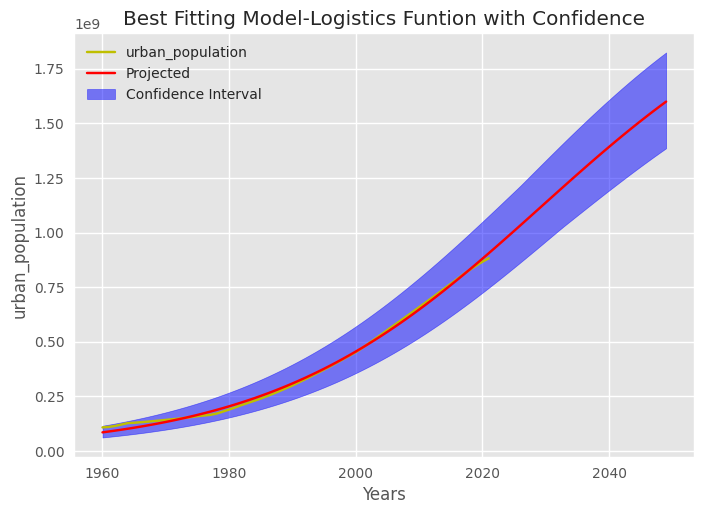

In [73]:
# Calling pre-defined Plotting function for the Fitted Model

generate_optimal_fit_visualization(pop_stat_orig, year_ind, forecast_ind, low_ind, up_ind, "Years",
              "urban_population", "Years", "urban_population", "Best Fitting Model-Logistics Funtion with Confidence",
              'y', 'r','b')



The graph provided showcases the urban population growth in India from 1960 onwards, with projections extending past 2020 using a logistic function for the modeling.

The orange line represents the actual recorded urban population in India.
The red line indicates the projected urban population based on the logistic growth model.
The blue shaded area defines the confidence interval around the projection, indicating the potential range of the true urban population values with a specified degree of confidence.

In [74]:
# Defining the envelop for the predicted year including the available year ranges
year_chn = np.arange(1960, 2050)

# Assigning the above created year value with population parameter obtained above to get the forecast shape
forecast_chn = logistics(year_chn, *popt_chn)

In [75]:
# Findign the lower & upper ranges of the envelop using the error range funtion defined before
low_chn, up_chn = err_ranges(year_chn, logistics, popt_chn, sigma_chn)

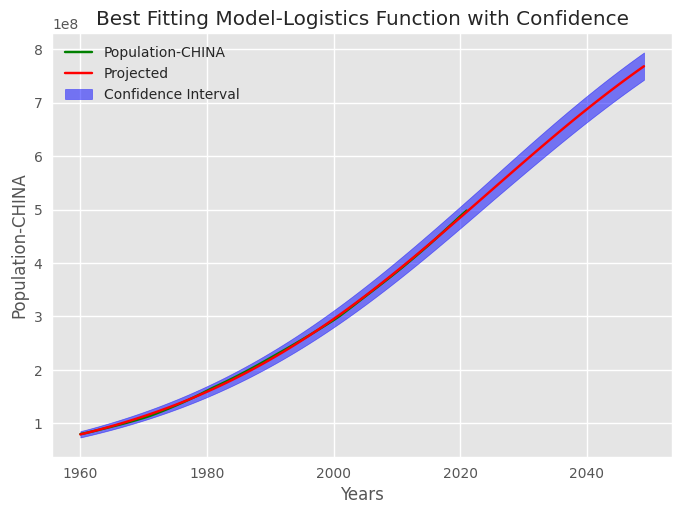

In [76]:
# Calling pre-defined Plotting function for the Fitted Model
generate_optimal_fit_visualization(pop_stat_orig_chn, year_chn, forecast_chn, low_chn, up_chn,
              "Years", "urban_population", "Years", "Population-CHINA", "Best Fitting Model-Logistics Function with Confidence",
              'g', 'r', 'b')

The graph presented appears to illustrate the population growth of China from 1960 to beyond 2020, using a logistic function to model the data. Based on the graph:

The green line represents the actual recorded population data for China.
The red line indicates the projected population based on the logistic growth model.
The blue shaded area signifies the confidence interval around the projection, suggesting the range within which the true population values are expected to fall with a certain level of confidence.

# 11. Conclusion

Both graphs depict logistic growth models with confidence intervals, but they represent different datasets: the first for the population of China and the second for the urban population of India. Here's a comparison of the two:

Growth Patterns:

Both countries' populations are modeled with a logistic function, which suggests a rapid growth phase followed by a tapering off as the population approaches a certain limit or carrying capacity.
China's overall population appears to be reaching its plateau, indicating a slowing growth rate and possibly nearing its carrying capacity.
India's urban population growth does not yet appear to be leveling off as significantly as China's overall population. This suggests that India's urban population might still be in a phase of rapid growth, moving towards its saturation point but not as close to it as China's population.
Confidence Intervals:

The confidence intervals in both graphs widen over time, which is typical as projections extend further into the future due to increased uncertainty.
However, the confidence interval for India's urban population projection seems to be wider than that for China's population projection. This could suggest a higher level of uncertainty in the urbanization trends or data variability for India, or it might reflect different modeling assumptions, data quality, or the inherent unpredictability of urban growth patterns.
Temporal Coverage and Trends:

Both datasets cover historical data from 1960 to 2020 and make projections beyond that. While historical data fit the model well, the projections are speculative and depend heavily on the continued validity of the logistic growth model for each population type.
The growth trajectory for India's urban population looks steeper in recent decades compared to China's overall population growth. This could reflect India's urbanization phase, which often comes later in a country's development and can involve more rapid shifts from rural to urban living.
Implications for Policy and Planning:

China's policymakers might focus on managing the implications of a stabilizing population, such as aging demographics and workforce planning.
In contrast, India's urban planners might be more concerned with the challenges of rapid urban growth, such as infrastructure development, housing, and sustainable city planning.
In summary, while both countries show logistic growth, the stage and rate of growth differ, reflecting the unique demographic and urbanization challenges each country faces. China's population is nearing a plateau, while India's urban population is still on a rapid growth trajectory with a wider range of possible future outcomes.